# American mass shootings Map visualizer

## Objectives

*   Showcase of year by year analysis of mass shootings in United States of America
*   Detailed visualization on location of the events, victims and the approximate timeline
*   Primary purpose is to engage user with fluid visuals to comprehand severity of these fatal events and spread awareness about gun violence
*   Data source : [Mother Jones and the Foundation for National Progress](https://docs.google.com/spreadsheets/d/e/2PACX-1vQBEbQoWMn_P81DuwmlQC0_jr2sJDzkkC0mvF6WLcM53ZYXi8RMfUlunvP1B5W0jRrJvH-wc-WGjDB1/pub?gid=0&single=true&output=csv)


In [83]:
import pandas as pd
import numpy as np
import geopy as gp
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

In [84]:
# Reading the database
BaseData = pd.read_csv("Data/MotherJonesDataBase.csv")

# Only fetching the values that is useful for this task
BaseData = BaseData[['location','date','total_victims']]
BaseData.head()

,location,date,total_victims
0,"Smithsburg, Maryland",6/9/22,4
1,"Tulsa, Oklahoma",6/1/22,TK
2,"Uvalde, Texas",5/24/22,38
3,"Buffalo, New York",5/14/22,13
4,"Sacramento, California",2/28/22,4


In [85]:
# converting dates into dateTime format and sorting it by date
BaseData['date'] = pd.to_datetime(BaseData['date'])
BaseData = BaseData.sort_values(by="date")
BaseData.head()

,location,date,total_victims
129,"Miami, Florida",1982-08-20,11
128,"Dallas, Texas",1984-06-29,7
127,"San Ysidro, California",1984-07-18,41
126,"Edmond, Oklahoma",1986-08-20,21
125,"Palm Bay, Florida",1987-04-23,20


In [86]:

# Fetching month and year out of the date column
BaseData['year'] = pd.DatetimeIndex(BaseData['date']).year
BaseData['month'] = pd.DatetimeIndex(BaseData['date']).month
#dropping the date column
BaseData = BaseData.drop("date", axis=1)

BaseData.head()

,location,total_victims,year,month
129,"Miami, Florida",11,1982,8
128,"Dallas, Texas",7,1984,6
127,"San Ysidro, California",41,1984,7
126,"Edmond, Oklahoma",21,1986,8
125,"Palm Bay, Florida",20,1987,4


In [87]:
# Dropping rows that has any missing values
print("Shape before dropping rows with any empty value : ", BaseData.shape)
BaseData = BaseData.dropna()
print("Shape after dropping rows with any empty value : ", BaseData.shape)

# total_victim has to have all the numeric values,
BaseData['total_victims'] = pd.to_numeric(BaseData['total_victims'], downcast='signed', errors = 'coerce')
# location has to have all the string values,
BaseData['location'] = BaseData['location'].astype("string")
# any row that has NAN remove that
print("Shape before removing NAN : ", BaseData.shape)
BaseData = BaseData.dropna(subset=['location','total_victims','year','month'])
print("Shape after removing NAN : ", BaseData.shape)

BaseData.dtypes

Shape before dropping rows with any empty value :  (130, 4)
Shape after dropping rows with any empty value :  (130, 4)
Shape before removing NAN :  (130, 4)
Shape after removing NAN :  (129, 4)


location          string
total_victims    float64
year               int64
month              int64
dtype: object

In [88]:
# split the city and the state
#BaseData[['city','state']] = BaseData['location'].str.split(',',expand=True)
# removing any extra spaces around the name of the city and state
#BaseData['city'] = BaseData['city'].str.strip()
#BaseData['state'] = BaseData['state'].str.strip()
#BaseData.head()

In [89]:
# Setting up application to find lattitude and longitude of various places
# I am using openStreetMap data with Nominatim geocoder
geolocator = gp.Nominatim(user_agent="AA_Map_Visualizer.ipynb")
location = geolocator.geocode("Dallas, Texas")
print(location.latitude, location.longitude)
BaseData.dtypes

# since we will be doing repeated calls to nominatim, we need to use limiter to slow it down to avoid errors.
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

32.7762719 -96.7968559


In [ ]:
# now let's use this geolocator to fetch latitude and longitude for all the cities we want to plot on the graph
BaseData['LocationObj'] = BaseData['location'].apply(geocode)
BaseData.head()

In [91]:
# Load latitude and longitude using LocationObj returned by Geocoder
# See if the object type is of None, then just o/p NAN
BaseData['latitude'] = BaseData['LocationObj'].apply(lambda x : x.latitude if x != None else np.NAN)
BaseData['longitude'] = BaseData['LocationObj'].apply(lambda x : x.longitude if x != None else np.NAN)

# we don't need LocationObj anymore so remove it
BaseData.drop('LocationObj', axis=1)
# Remove any row that has NAN values
BaseData.dropna(subset=['latitude', 'longitude'])

BaseData.head()

,location,total_victims,year,month,LocationObj,latitude,longitude
129,"Miami, Florida",11.0,1982,8,"(Miami, Miami-Dade County, Florida, 33131, Uni...",25.774173,-80.193620
128,"Dallas, Texas",7.0,1984,6,"(Dallas, Dallas County, Texas, United States, ...",32.776272,-96.796856
127,"San Ysidro, California",41.0,1984,7,"(San Ysidro, San Diego, San Diego County, Cali...",32.552001,-117.043081
126,"Edmond, Oklahoma",21.0,1986,8,"(Edmond, Oklahoma County, Oklahoma, 73083, Uni...",35.657137,-97.464904
125,"Palm Bay, Florida",20.0,1987,4,"(Palm Bay, Brevard County, Florida, United Sta...",27.994697,-80.636614


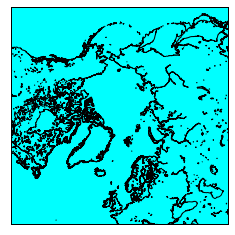

In [108]:
# setting up a map of the usa
from mpl_toolkits.basemap import Basemap as bmp

# Usa coordinates
llon=-125 # lower left hand map corner longitude
ulon=-65 # Upper right hand map corner longitude
llat=25
ulat=50

mp = bmp(projection='aeqd',resolution='i',lon_0 = 0, lat_0 =90  , width = 10000000, height = 10000000) #llcrnrlon = llon, llcrnrlat = llat, urcrnrlon = ulon, urcrnrlat = ulat
mp.drawcoastlines()
mp.drawmapboundary(fill_color='aqua')
mp.fillcontinents(color='coral',lake_color='aqua')
plt.show()